In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [6]:
df.corr()['Outcome']

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


In [7]:
x = df.iloc[: , :-1].values
y = df['Outcome'].values


scaler = StandardScaler()

x = scaler.fit_transform(x)

x_train, x_test , y_train , y_test = train_test_split(x , y, test_size = 0.2 , random_state = 2)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [9]:
x_train

array([[-0.84488505,  0.09719231,  0.25303625, ..., -0.53211885,
        -1.12311057, -0.27575966],
       [-0.84488505, -0.81042491,  0.66661825, ...,  0.38169971,
        -0.72143478,  0.83038113],
       [-1.14185152, -0.84172205,  0.04624525, ...,  1.4605133 ,
        -0.37714125, -1.04154944],
       ...,
       [ 0.04601433,  0.12848945,  0.04624525, ..., -0.39250768,
         2.02989333,  1.00055664],
       [-0.25095213, -0.15318486,  0.25303625, ..., -0.72249772,
        -1.10196973, -0.78628618],
       [ 0.04601433, -0.34096773, -0.16054575, ..., -0.01174995,
        -0.00264654, -0.36084741]])

# model building

In [17]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras  import Sequential

In [11]:
model = Sequential()

model.add(Dense(32 , activation = 'relu' , input_dim = 8))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer = 'Adam' , loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
history = model.fit(x_train , y_train , epochs = 50 , batch_size = 32 , validation_data = (x_test , y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6295 - loss: 0.6595 - val_accuracy: 0.6623 - val_loss: 0.6237
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7164 - loss: 0.5979 - val_accuracy: 0.7403 - val_loss: 0.5825
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7489 - loss: 0.5681 - val_accuracy: 0.7662 - val_loss: 0.5550
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7521 - loss: 0.5510 - val_accuracy: 0.7662 - val_loss: 0.5370
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7573 - loss: 0.5365 - val_accuracy: 0.7662 - val_loss: 0.5226
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7851 - loss: 0.5090 - val_accuracy: 0.7727 - val_loss: 0.5111
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7892 - loss: 0.4911 - val_accuracy: 0.7792 - val_loss: 0.5023
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7700 - loss: 0.4845 - val_accuracy: 0.7857 - val_loss

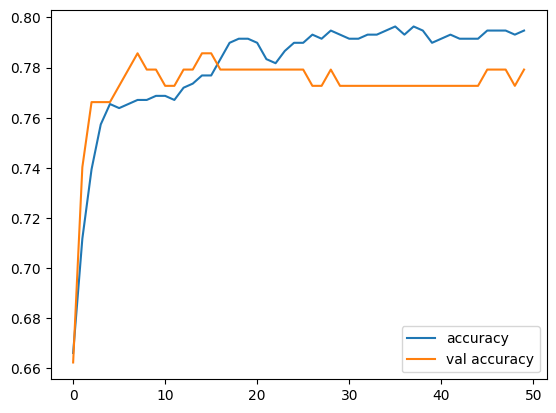

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'] , label = 'accuracy')
plt.plot(history.history['val_accuracy'] , label = 'val accuracy')
plt.legend()

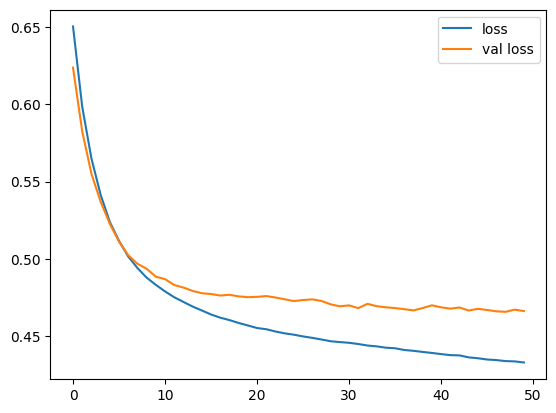

In [15]:
plt.plot(history.history['loss'] , label = 'loss')
plt.plot(history.history['val_loss'] , label = 'val loss')
plt.legend()

In [16]:
model = Sequential()

model.add(Dense(32 , activation = 'relu' , input_dim = 8))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()
model.compile(optimizer = 'Adam' , loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train , y_train , epochs = 25 , batch_size = 32 , validation_data = (x_test , y_test))

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6321 - loss: 0.6521 - val_accuracy: 0.7338 - val_loss: 0.5815
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7329 - loss: 0.5830 - val_accuracy: 0.7403 - val_loss: 0.5495
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7395 - loss: 0.5482 - val_accuracy: 0.7727 - val_loss: 0.5295
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7690 - loss: 0.5260 - val_accuracy: 0.7532 - val_loss: 0.5163
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7461 - loss: 0.5318 - val_accuracy: 0.7403 - val_loss: 0.5078
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7688 - loss: 0.4782 - val_accuracy: 0.7403 - val_loss: 0.5007
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7852 - loss: 0.4802 - val_accuracy: 0.7403 - val_loss: 0.4958
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7377 - loss: 0.5005 - val_accuracy: 0.7532 - val_loss

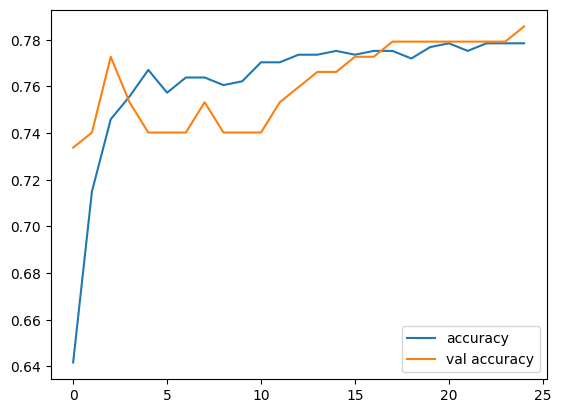

In [18]:
plt.plot(history.history['accuracy'] , label = 'accuracy')
plt.plot(history.history['val_accuracy'] , label = 'val accuracy')
plt.legend()

In [17]:
# 1. How to select approperiate optimizer
# 2. no. of nodes in layers
# 3. how to select no. of layers
# 4. all parameters tuning at once

# 1. How to select approperiate optimizer

In [19]:
pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00


In [20]:
import kerastuner as kt

<ipython-input-20-5fd8096cdee5>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [21]:
def build_model(hp):  #hp is hyperparameter
  model = Sequential()

  model.add(Dense(32 , activation = 'relu' , input_dim = 8))
  model.add(Dense(1, activation = 'sigmoid' ))

  optimizer = hp.Choice('optimizer' , values = ['sgd' ,'adam' ,'rmsprop'])

  model.compile(optimizer = optimizer , loss = 'binary_crossentropy' , metrics = ['accuracy'])

  return model

In [22]:
tuner = kt.RandomSearch ( build_model,
            objective='val_accuracy',   #val_accuracy ko increase karna hai
            max_trials = 5,         # like cv in machine learning
            directory = 'my_dir 1',
            project_name = 'optimizer'
        )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
tuner.search(x_train , y_train , epochs = 25 ,batch_size = 32 , validation_data = (x_test , y_test))

Trial 3 Complete [00h 00m 04s]
val_accuracy: 0.7857142686843872

Best val_accuracy So Far: 0.7857142686843872
Total elapsed time: 00h 00m 19s


In [24]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [25]:
model = tuner.get_best_models(num_models=1)[0]    #we can get best model this way

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.fit(x_train , y_train , epochs = 100 , batch_size = 32 , initial_epoch=6, validation_data = (x_test , y_test))   # pehle 5 epoch tak train ho chuka hai so, 6th epoch se training suru hoga

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7787 - loss: 0.4443 - val_accuracy: 0.7922 - val_loss: 0.4676
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7666 - loss: 0.4551 - val_accuracy: 0.7922 - val_loss: 0.4674
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7756 - loss: 0.4527 - val_accuracy: 0.7922 - val_loss: 0.4678
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7444 - loss: 0.4737 - val_accuracy: 0.7727 - val_loss: 0.4698
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7863 - loss: 0.4296 - val_accuracy: 0.7662 - val_loss: 0.4694
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7823 - loss: 0.4267 - val_accuracy: 0.7727 - val_loss: 0.4694
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7747 - loss: 0.4407 - val_accuracy: 0.7727 - val_loss: 0.4689
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7913 - loss: 0.4374 - val_accuracy: 0.77

In [28]:
model.evaluate(x_train , y_train)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7814 - loss: 0.4113 


[0.40547141432762146, 0.7964169383049011]

above training loss and accuracy

In [29]:
model.evaluate(x_test , y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7810 - loss: 0.4697 


[0.4676930904388428, 0.7857142686843872]

above testing loss and accuracy

# 2. no. of nodes in layers

In [30]:
def build_model(hp):
  model = Sequential()

  units = hp.Int('units' , min_value = 8, max_value = 128 , step = 8)  # first layer neuron=8 then 16 then 24,32,40.......... till 128

  model.add(Dense(units = units , activation = 'relu', input_dim = 8))  #relu we found above
  model.add(Dense(1 , activation = 'sigmoid'))

  model.compile( optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

  return model

In [31]:
tuner = kt.RandomSearch(build_model,
                        objective = 'val_accuracy',
                        max_trials = 5,
                        directory = 'my_dir 2',
                        project_name = 'num of nodes'
        )

In [32]:
tuner.search(x_train , y_train , epochs = 25 , batch_size = 32 , validation_data = (x_test , y_test))

Trial 5 Complete [00h 00m 05s]
val_accuracy: 0.7922077775001526

Best val_accuracy So Far: 0.7922077775001526
Total elapsed time: 00h 00m 27s


In [33]:
tuner.get_best_hyperparameters()[0].values

{'units': 88}

In [34]:
model = tuner.get_best_models(num_models = 1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 88)                  │             792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              89 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 881 (3.44 KB)

 Trainable params: 881 (3.44 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.evaluate(x_train , y_train)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7782 - loss: 0.4402  


[0.4310159981250763, 0.791530966758728]

above training loss and accuracy

In [37]:
model.evaluate(x_test , y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7836 - loss: 0.4743 


[0.46817582845687866, 0.7922077775001526]

above testing loss and accuracy

# 3. how to select no. of layers

In [38]:
def build_model(hp):
  model = Sequential()

  model.add(Dense(56 , activation = 'relu' , input_dim = 8))  # just after input layer

  num_layers = hp.Int('no of layes' , min_value = 1 , max_value = 11)

  for i in range(num_layers):  # hidden layers
    model.add(Dense(56 , activation = 'relu'))

  model.add(Dense(1, activation = 'sigmoid')) # output layer

  model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

  return model

In [39]:
tuner = kt.RandomSearch(
              build_model,
              objective = 'val_accuracy',
              max_trials = 5,
              directory = 'my_dir 3',
              project_name = 'num layers'
        )

In [40]:
tuner.search(x_train , y_train , batch_size = 32 , epochs = 25 , validation_data = (x_test, y_test))

Trial 5 Complete [00h 00m 10s]
val_accuracy: 0.7597402334213257

Best val_accuracy So Far: 0.8051947951316833
Total elapsed time: 00h 00m 38s


In [41]:
tuner.get_best_hyperparameters()[0].values

{'no of layes': 8}

In [42]:
model = tuner.get_best_models(num_models = 1)[0]

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 56)                  │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 56)                  │           3,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 56)                  │           3,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 56)                  │           3,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 56)                  │           3,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 56)                  │           3,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 56)                  │           3,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 56)                  │           3,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 56)                  │           3,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              57 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,097 (101.94 KB)

 Trainable params: 26,097 (101.94 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.evaluate(x_train , y_train)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8608 - loss: 0.3269  


[0.3198234736919403, 0.8648208379745483]

above traing loss and accuracy

In [45]:
model.evaluate(x_test , y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7910 - loss: 0.4589 


[0.45934930443763733, 0.8051947951316833]

above testing loss and accuracy

# 4. all parameters tuning at once

In [46]:
def build_model(hp):
  model = Sequential()

  counter = 0

  num_layers = hp.Int('num layers' , min_value = 1 , max_value = 11)

  for i in range(num_layers):

    if counter == 0 :  # just after input layer
      model.add(Dense(units = hp.Int('units ' + str(i) , min_value = 2 , max_value = 128 , step = 2 ) , activation = hp.Choice('activation ' + str(i) , values = ['relu' ,'tanh', 'sigmoid'])  , input_dim = 8))
      model.add(Dropout(hp.Choice('dropout ' + str(i) , values = [0.1 , 0.2 , 0.3 , 0.4 , 0.5 ,0.6,0.7,0.8,0.9])))
    else:   # other hidden layers
      model.add(Dense(units = hp.Int('units ' + str(i) , min_value = 2 , max_value = 128 , step = 2 ) , activation = hp.Choice('activation ' + str(i) , values = ['relu' ,'tanh', 'sigmoid'])))
      model.add(Dropout(hp.Choice('dropout ' + str(i) , values = [0.1 , 0.2 , 0.3 , 0.4 , 0.5 ,0.6,0.7,0.8,0.9])))
    counter = counter + 1

  model.add(Dense(1, activation = 'sigmoid' ))

  model.compile(optimizer = hp.Choice('optimizer' , values = ['adam' , 'sgd', 'rmsprop' , 'nadam', 'adadelta']) , loss = 'binary_crossentropy' , metrics = ['accuracy'])

  return model

In [47]:
tuner = kt.RandomSearch(build_model,
                        objective = 'val_accuracy' ,
                        max_trials = 5,
                        directory = 'my dir 4',
                        project_name = 'mega tuning'
        )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
tuner.search(x_train , y_train , batch_size = 32 , epochs = 25 , validation_data = (x_test , y_test))

In [50]:
tuner.get_best_hyperparameters()[0].values

{'num layers': 11,
 'units 0': 34,
 'activation 0': 'tanh',
 'dropout 0': 0.9,
 'optimizer': 'sgd',
 'units 1': 2,
 'activation 1': 'relu',
 'dropout 1': 0.1,
 'units 2': 2,
 'activation 2': 'relu',
 'dropout 2': 0.1,
 'units 3': 2,
 'activation 3': 'relu',
 'dropout 3': 0.1,
 'units 4': 2,
 'activation 4': 'relu',
 'dropout 4': 0.1,
 'units 5': 2,
 'activation 5': 'relu',
 'dropout 5': 0.1,
 'units 6': 2,
 'activation 6': 'relu',
 'dropout 6': 0.1,
 'units 7': 2,
 'activation 7': 'relu',
 'dropout 7': 0.1,
 'units 8': 2,
 'activation 8': 'relu',
 'dropout 8': 0.1,
 'units 9': 2,
 'activation 9': 'relu',
 'dropout 9': 0.1,
 'units 10': 2,
 'activation 10': 'relu',
 'dropout 10': 0.1}

In [51]:
model = tuner.get_best_models(num_models = 1)[0]

In [52]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 34)                  │             306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 34)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.evaluate(x_train , y_train)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6404 - loss: 0.6896  


[0.6897286772727966, 0.6368077993392944]

above training loss and accuracy

In [54]:
model.evaluate(x_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6717 - loss: 0.6888 


[0.6879124045372009, 0.7077922224998474]

above testing loss and accuracy